In [1]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [2]:
chini_folder = "/home/data/simon/result/chini"
rasterio = PyCall.pyimport("rasterio");

### Houston 

In [3]:
data_folder = "/home/data/simon/processed/test_areas/houston_new"

"/home/data/simon/processed/test_areas/houston_new"

In [4]:
geo_lut = JLD.load(joinpath(data_folder,"coordinates.jld"));

### Buldings 

In [5]:
urban_tiff = rasterio.open(joinpath(chini_folder,"reproject_test.tif"));
transform = urban_tiff.get_transform()

6-element Array{Float64,1}:
 -97.590779048           
   0.00020151899054917036
   0.0                   
  31.144274541           
   0.0                   
  -0.0001849766948840068 

In [6]:
urban_tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 13018
  "nodata"    => 255.0
  "count"     => 1
  "width"     => 15660
  "transform" => (0.000201519, 0.0, -97.5908, 0.0, -0.000184977, 31.1443, 0.0, …
  "crs"       => PyObject CRS.from_epsg(4326)

In [19]:
index = [ (reshape(geo_lut["latitude"],:).-transform[4])./(transform[6]),(reshape(geo_lut["longitude"],:).-transform[1])./transform[2]];

In [20]:
bulding_mask = convert.(Float64,urban_tiff.read(1));
bulding_mask[bulding_mask .>1] .= 1;
bulding_mask = ndimage.map_coordinates(bulding_mask, index, order=1, mode="constant",cval=0);
bulding_mask = reshape(bulding_mask,size(geo_lut["latitude"]));

In [21]:
maximum(bulding_mask),minimum(bulding_mask)

(1.0, 0.0)

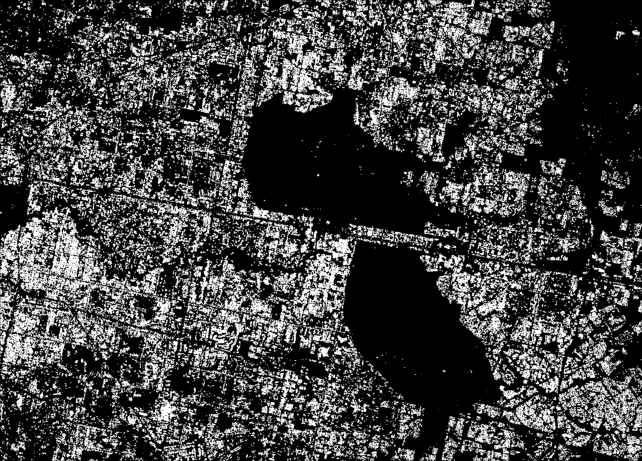

In [23]:
Colors.Gray.(bulding_mask.>0.5)

In [24]:
file_name = joinpath(data_folder,"chini_building.jld")
JLD.save(file_name, "data",bulding_mask);

### urban_flood

In [5]:
tiff = rasterio.open(joinpath(chini_folder,"urban_flood_chini.tif"));
transform = tiff.get_transform()

6-element Array{Float64,1}:
 -97.590779048           
   0.00020151899054917036
   0.0                   
  31.144274541           
   0.0                   
  -0.0001849766948840068 

In [7]:
tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 13018
  "nodata"    => 255.0
  "count"     => 1
  "width"     => 15660
  "transform" => (0.000201519, 0.0, -97.5908, 0.0, -0.000184977, 31.1443, 0.0, …
  "crs"       => PyObject CRS.from_epsg(4326)

In [8]:
index = [ (reshape(geo_lut["latitude"],:).-transform[4])./(transform[6]),(reshape(geo_lut["longitude"],:).-transform[1])./transform[2]];

In [9]:
mask = convert.(Float64,tiff.read(1));
mask[mask .>1] .= 1;
mask = ndimage.map_coordinates(mask, index, order=1, mode="constant",cval=0);
mask = reshape(mask,size(geo_lut["latitude"]));

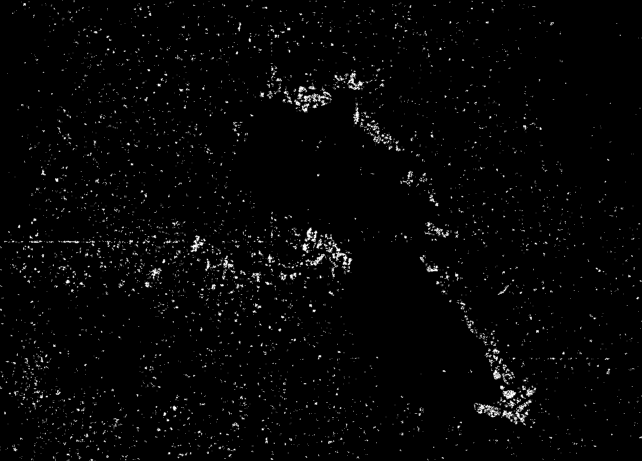

In [10]:
Colors.Gray.(mask.>0.5)

In [11]:
file_name = joinpath(data_folder,"urban_flood_chini.jld")
JLD.save(file_name, "data",mask);

### bare_soil

In [12]:
tiff = rasterio.open(joinpath(chini_folder,"bare_soil_chini.tif"));
transform = tiff.get_transform()

6-element Array{Float64,1}:
 -97.5916063             
   0.00020152034244126668
   0.0                   
  31.144094141           
   0.0                   
  -0.00018497913221172314

In [13]:
tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 13017
  "nodata"    => 255.0
  "count"     => 1
  "width"     => 15664
  "transform" => (0.00020152, 0.0, -97.5916, 0.0, -0.000184979, 31.1441, 0.0, 0…
  "crs"       => PyObject CRS.from_epsg(4326)

In [14]:
index = [ (reshape(geo_lut["latitude"],:).-transform[4])./(transform[6]),(reshape(geo_lut["longitude"],:).-transform[1])./transform[2]];

In [15]:
mask = convert.(Float64,tiff.read(1));
mask[mask .>1] .= 1;
mask = ndimage.map_coordinates(mask, index, order=1, mode="constant",cval=0);
mask = reshape(mask,size(geo_lut["latitude"]));

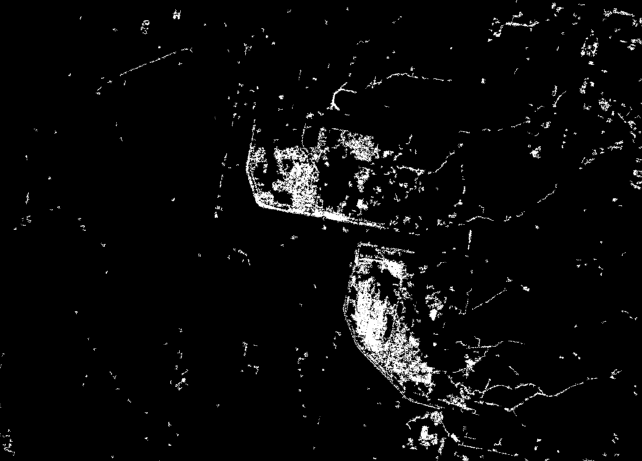

In [16]:
Colors.Gray.(mask.>0.5)

In [17]:
file_name = joinpath(data_folder,"bare_soil_chini.jld")
JLD.save(file_name, "data",mask);

# Vejle

In [18]:
data_folder = "/home/data/simon/processed/test_areas/vejle_new"
geo_lut = JLD.load(joinpath(data_folder,"coordinates.jld"));

In [19]:
tiff = rasterio.open(joinpath(chini_folder,"hasard_vejle.tif"));
transform = tiff.get_transform()

6-element Array{Float64,1}:
  9.18071864686146      
  0.00017966300000000015
  0.0                   
 55.8683424657353       
  0.0                   
 -0.00017966299999999937

In [20]:
tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 2239
  "nodata"    => nothing
  "count"     => 1
  "width"     => 4975
  "transform" => (0.000179663, 0.0, 9.18072, 0.0, -0.000179663, 55.8683, 0.0, 0…
  "crs"       => PyObject CRS.from_epsg(4326)

In [21]:
index = [ (reshape(geo_lut["latitude"],:).-transform[4])./(transform[6]),(reshape(geo_lut["longitude"],:).-transform[1])./transform[2]];

In [22]:
mask = convert.(Float64,tiff.read(1));
mask[mask .>1] .= 1;
mask = ndimage.map_coordinates(mask, index, order=1, mode="constant",cval=0);
mask = reshape(mask,size(geo_lut["latitude"]));

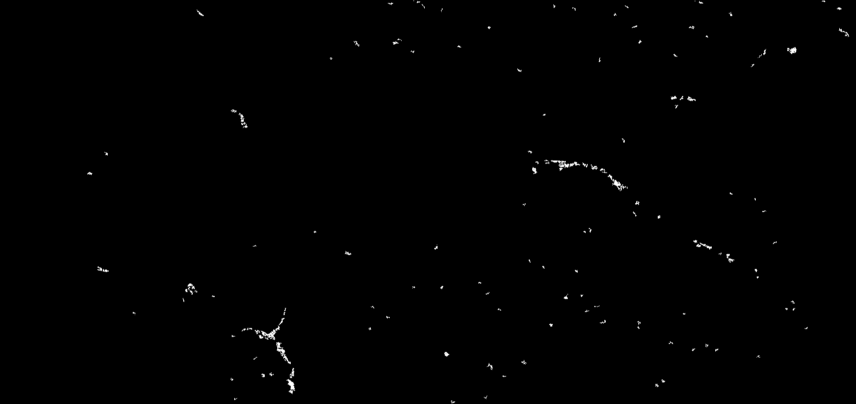

In [23]:
Colors.Gray.(mask.>0.5)

In [24]:
file_name = joinpath(data_folder,"hasard.jld")
JLD.save(file_name, "data",mask);

# Vejle

In [25]:
data_folder = "/home/data/simon/processed/test_areas/ribe_new"
geo_lut = JLD.load(joinpath(data_folder,"coordinates.jld"));

In [31]:
tiff = rasterio.open(joinpath(chini_folder,"hasard_ribe.tif"));
transform = tiff.get_transform()

6-element Array{Float64,1}:
  8.463355317901403     
  0.00017966300000000015
  0.0                   
 55.51965891092721      
  0.0                   
 -0.00017966299999999926

In [32]:
tiff.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "uint8"
  "height"    => 2320
  "nodata"    => nothing
  "count"     => 1
  "width"     => 4148
  "transform" => (0.000179663, 0.0, 8.46336, 0.0, -0.000179663, 55.5197, 0.0, 0…
  "crs"       => PyObject CRS.from_epsg(4326)

In [33]:
index = [ (reshape(geo_lut["latitude"],:).-transform[4])./(transform[6]),(reshape(geo_lut["longitude"],:).-transform[1])./transform[2]];

In [34]:
mask = convert.(Float64,tiff.read(1));
mask[mask .>1] .= 1;
mask = ndimage.map_coordinates(mask, index, order=1, mode="constant",cval=0);
mask = reshape(mask,size(geo_lut["latitude"]));

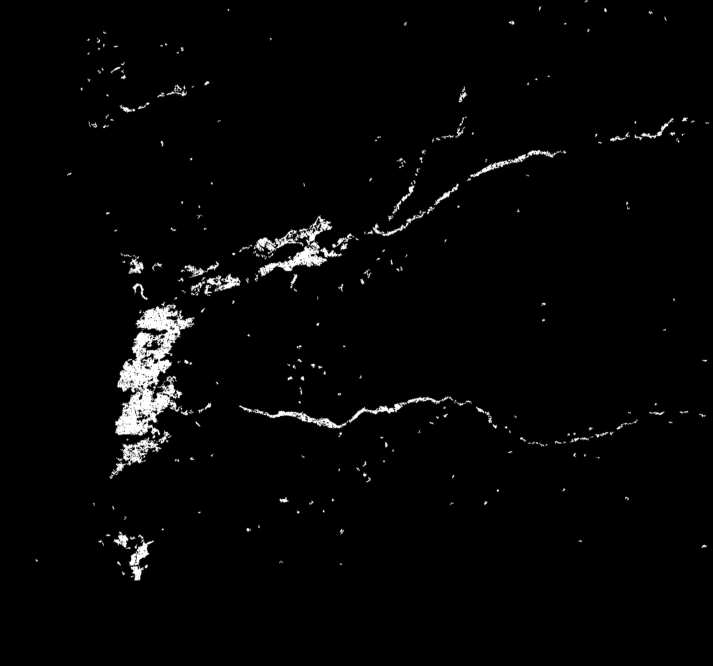

In [35]:
Colors.Gray.(mask.>0.5)

In [36]:
file_name = joinpath(data_folder,"hasard.jld")
JLD.save(file_name, "data",mask);